# Information model
Various experiments involving the information models as well as the scores.

In [8]:
# allow imports from the main source directory
import sys
sys.path.append('..')
import logging

import math
import itertools
import random
import logging
from functools import partial

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc

from IPython.display import display, HTML
from Environment import Environment, DissipationModelEnvironment, EpidemicSpreadEnvironment
from InformationModel import GaussianProcessScalarFieldIM
from InformationModel import im_score, im_score_rmse, im_score_rmse_weighted

logging.basicConfig(level=logging.WARNING)

## Example 1: estimate a pollution model with a gaussian process

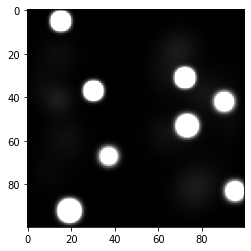

In [9]:
# create an environment to observe
env = DissipationModelEnvironment("water", width = 100, height = 100, seed=1)
env.evolve_speed = 1
env.p_pollution = 0.1
for t in range(120):
    env.proceed()
plt.imshow(env.value, vmin=0, vmax=1.0, cmap="gray")

In [20]:
im = GaussianProcessScalarFieldIM("sample", env.width, env.height)
# generate a series random observations
for i in range(400):
    x = random.randint(0, env.width-1)
    y = random.randint(0, env.height-1)
    value = env.value[x,y]
    obs = {"x": x, "y": y, "value": value}
    im.add_observation(obs)
im.proceed(1)

/home/lboloni/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


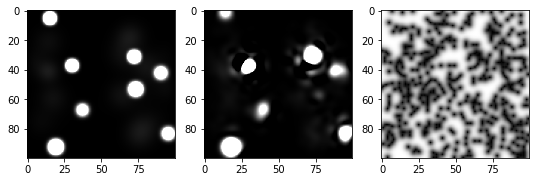

In [21]:
fig, (axenv, aximval, aximunc) = plt.subplots(1, 3, figsize = (9, 3))
axenv.imshow(env.value, vmin=0, vmax=1.0, cmap="gray")
aximval.imshow(im.value, vmin=0, vmax=1.0, cmap="gray")
aximunc.imshow(im.uncertainty, vmin=0, vmax=1.0, cmap="gray")

In [22]:
score_rmse = im_score_rmse(im, env)

NameError: name 'im_score_rmse' is not defined